# Gaussian Discriminant Analysis On Wisconsin Diagnostic Breast Cancer Dataset

In [184]:
import pandas as pd #读csv
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import metrics

## 读取数据

In [13]:
df = pd.read_csv('/home/ysq/桌面/BreastCancer/wdbc.data',header=None)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

### df.info()返回了数据集的摘要，可以看出：
- 数据集为569*31的矩阵，即有569条数据，每条数据有31个属性
- 属性0为每个样本的唯一ID，这个属性在分类时用不到，可以删除
- 属性1为非数值型数据，是每个数据为良性或恶性的标记，可作为分类的真值
- 属性2~31为数值型数据，这些属性将作为我们分类时用到的属性，可以认为一个数据是否为良性或恶性由这些属性决定
- 该数据集中没有缺失值

## 数据预处理
- 删除ID列，即第0列
- 对2~31列的数据标准化处理
- 为标签编码
- 增广矩阵：添加一个全1列为偏置做准备

In [15]:
#df = df[~df[0].isin([911296202,865423,8610862])]
#删除第0列
df_ = df.drop(df.columns[0],axis=1)
print(df_.shape) #显示是否删除成功
if df_.shape[1] == df.shape[1]-1:
    print("删除成功")

(569, 31)
删除成功


In [16]:
df_.head() #查看当前数据

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#实例化
df_tmp = df_.drop(df.columns[1],axis=1)
std = scaler.fit_transform(df_tmp) #ndarray
#将ndarray转为dataframe
df_std = pd.DataFrame(std)
df_std.shape

(569, 30)

### 统计数据集中良性(benign)和恶性(malignant)的个数

In [18]:
label_list = df_[1].values.tolist() #将标签列转为列表
dict(zip(*np.unique(label_list, return_counts=True)))
# 有357个良性，212个恶性 
print(label_list)

['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M',

### 对标记列进行one-hot编码
- 将M--恶性 编码为1，将B-- 良性编码为0

In [19]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()#实例化
label = coder.fit_transform(label_list) #y空间
print(label.shape)
#将M--恶性 编码为1，将B-- 良性编码为0

(569,)


#### 将编码后的列作为属性label加入df_std(已标准化后的dataframe)
当前，所有数据已被标准化，data就是X空间，label就是Y空间 

In [20]:
data = df_std.values #X空间

## 绘制混淆矩阵的函数

In [21]:
#绘制混淆矩阵
def confusion_matrix(matrix):
    """
        传入混淆矩阵，绘制图像
    """
    guess = ["malignant","benign"]
    fact = [ "malignant","benign"]
    classes = list(set(fact))
    classes.sort(reverse=True)
    r1=matrix

    plt.figure(figsize=(8,5))       #设置plt窗口的大小
    confusion =r1
    print("confusion",confusion)
    plt.imshow(confusion, cmap=plt.cm.Blues)
    indices = range(len(confusion))
    indices2 = range(3)
    plt.xticks(indices, classes,rotation=40,fontsize=18)
    plt.yticks([0.00,1.00], classes,fontsize=18)
    plt.ylim(1.5 , -0.5)   #设置y的纵坐标的上下限

    plt.title("Confusion matrix",fontdict={'weight':'normal','size': 18})
    #设置color bar的标签大小
    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.xlabel('Predict label',fontsize=18)
    plt.ylabel('True label',fontsize=18)

    print("len(confusion)",len(confusion))
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            if confusion[first_index][second_index]>200:
                color="w"
            else:
                color="black"
            plt.text(first_index, second_index, confusion[first_index][second_index],fontsize=18, color = color,verticalalignment='center',horizontalalignment='center',)
    plt.show()

## 构建模型

In [194]:
class GaussianDiscriminantAnalysis:
    def __init__(self,X_train,y_train,X_test,y_test):
        """
            类初始化函数，传递参数为：
            X_train 训练集数据
            y_train 训练集标签
            X_test 测试集数据
            y_test 测试集标签
            内建属性:parameters GDA的参数: u0 第0类均值,u1 第1类均值,phi Bernoulli分布参数(Y=1的概率),sigma 协方差矩阵
        """
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.parameters = {}#空字典，用于存储GDA的参数
    def compute_GDA_parameters(self):
        """
            用于计算GDA模型的参数u0,u1,pho,sigma
            将计算结果带回到self.parameters中
        """
        #获取(各类的元素下标
        row_index_M = np.where(self.y_train==1)#返回一个包含训练集中所有类别为1的元素下标的元组
        row_index_B = np.where(self.y_train==0)#返回一个包含训练集中所有类别为0的元素下标的元组
        #计算均值
        u = lambda row_index : np.mean(X_train[row_index],axis=0,keepdims=True)#计算列方向上的均值
        u0 = u(row_index_B)
        u1 = u(row_index_M)
        
        #计算Bernoulli分布参数phi
        num_M = row_index_M[0].shape[0]#统计训练集中类别为1的样本个数
        phi = num_M/y_train.shape[0]
        
    #计算协方差矩阵
     #分治计算，先算类别1的后算类别0的，二者合起来后在除总样本数
        #计算类别为m的部分协方差矩阵
        sigma = np.zeros([u0.shape[1],u0.shape[1]])#初始化为0矩阵
        for i in range(self.X_train.shape[0]):#遍历训练集所有样本
            if y_train[i] == 0:#若为第0类
                sigma += (self.X_train[i]-u0).T@(self.X_train[i]-u0)#向量相乘
            if y_train[i] == 1:
                sigma += (self.X_train[i]-u1).T@(self.X_train[i]-u1)
        sigma *= (1/self.X_train.shape[0]) 
        
        #将参数带回到结构体中
        self.parameters['u0'] = u0
        self.parameters['u1'] = u1
        self.parameters['phi'] = phi
        self.parameters['sigma'] = sigma
        
    def multi_variable_gaussian(self,class_):
        """
            根据多元高斯分布方式计算条件概率
            输入参数是class_ 是类别的数字，如0或1
            返回值是一个列表，代表当前样本
        """
        #接收预测概率的集合
        prob_list = []
        #均值
        u = self.parameters['u'+str(class_)]
        for i in range(self.X_test.shape[0]):#遍历测试集
            #分子
            numerator = np.exp(-0.5*(self.X_test[i]-u)@(np.linalg.inv(self.parameters['sigma']))@(self.X_test[i]-u).T)
            #分母
            denominator = (2*np.pi)**(u.shape[1]/2)*(np.linalg.det(self.parameters['sigma'])**0.5)
            prob = np.float64(numerator/denominator)
            prob_list.append(prob)
        return prob_list
    def hypothesis(self):
        """
            对测试集进行预测
            返回值两个列表组成的元组，分别代表了当前样本根据贝叶斯公式计算出的属于两类的概率
        """
        #计算条件概率
        pMlist = np.array(self.multi_variable_gaussian(1))
        pBlist = np.array(self.multi_variable_gaussian(0))
        #接收预测概率的列表
        hyp_M_list = []
        hyp_B_list = []
        for i in range(pMlist.shape[0]):
            p_M = pMlist[i]*self.parameters['phi'] #贝叶斯公式分子
            p_B = pBlist[i]*(1-self.parameters['phi'])
            _M = p_M/(p_M+p_B) #求出属于第1类概率
            _B = p_B/(p_M+p_B) #求出属于第0类概率
            hyp_M_list.append(_M)
            hyp_B_list.append(_B)
        return hyp_B_list,hyp_M_list #注意这里特意将hyp_B_list排在了前面，是为了后面调用np.argmax()更方便返回预测值
    
    def predict(self):
        """
            根据预测得到的列表对验证集上样本分类
        """        
        hyp = self.hypothesis()#预测值元组
        #tuple --> ndarray
        _hyp = np.array(hyp)
        
        prediction = np.argmax(_hyp,axis=0)#按列比大小，返回较大列的下标（0/1）
        return prediction
        

## 进行训练集和测试集的划分
- 使用5折分层交叉验证


------------------第 1 轮
模型训练完毕！参数为:
 {'u0': array([[-0.53563597, -0.26241954, -0.54890415, -0.52708002, -0.36797032,
        -0.49540101, -0.57540866, -0.62030424, -0.30873286, -0.06635322,
        -0.45025131,  0.00619279, -0.43356619, -0.42376316,  0.00066203,
        -0.26428566, -0.26473341, -0.36894735, -0.0280376 , -0.12824088,
        -0.57794416, -0.30517419, -0.58263353, -0.55148307, -0.39368926,
        -0.4666649 , -0.53760991, -0.6263342 , -0.34131412, -0.28395802]]), 'u1': array([[ 1.05646172,  0.58668172,  1.06689769,  1.03895307,  0.42094674,
         0.73816951,  0.94160394,  1.05416562,  0.34544517, -0.12767333,
         0.79818689,  0.03769617,  0.7696847 ,  0.79247471, -0.04413874,
         0.36781354,  0.35261257,  0.55658823, -0.0238084 ,  0.06957866,
         1.08406715,  0.61788068,  1.08051831,  1.0359749 ,  0.47696241,
         0.66166087,  0.82006273,  1.01200275,  0.38013331,  0.25772188]]), 'phi': 0.3722466960352423, 'sigma': array([[ 4.57992117e-01,  9.610

/home/ysq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in double_scalars
/home/ysq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in double_scalars


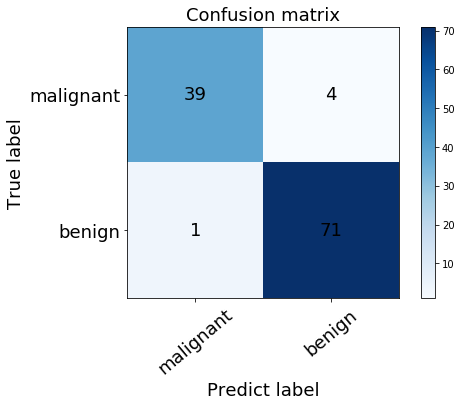

分类正确个数: 110 总样本个数: 115 正确率: 0.9565217391304348

-------------------------------------------------------


------------------第 2 轮
模型训练完毕！参数为:
 {'u0': array([[-0.56475889, -0.30537638, -0.57211375, -0.54722824, -0.2282763 ,
        -0.41741401, -0.52272364, -0.58631103, -0.24756355,  0.07535744,
        -0.44252253, -0.00986002, -0.42991425, -0.42580183,  0.06215458,
        -0.20842691, -0.18067222, -0.30229397, -0.00998161, -0.02898149,
        -0.59782917, -0.33676588, -0.6008656 , -0.56476611, -0.27943601,
        -0.42808381, -0.49421565, -0.592871  , -0.31212595, -0.20646532]]), 'u1': array([[ 0.98307177,  0.59024805,  0.99858045,  0.96434838,  0.42663155,
         0.77644252,  0.90296583,  1.00586982,  0.37899496, -0.02503544,
         0.72167377, -0.04740085,  0.71895724,  0.71997062, -0.12106297,
         0.37308402,  0.32747994,  0.53659709, -0.08649554,  0.10265439,
         1.03935448,  0.63815425,  1.0549113 ,  0.99431341,  0.54216376,
         0.81571622,  0.89199947,  1.0

len(confusion) 2


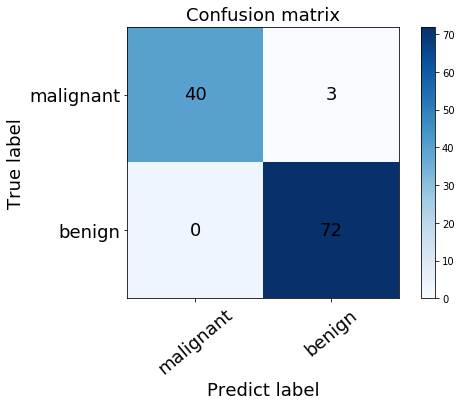

分类正确个数: 112 总样本个数: 115 正确率: 0.9739130434782609

-------------------------------------------------------


------------------第 3 轮
模型训练完毕！参数为:
 {'u0': array([[-0.57092359, -0.26335685, -0.57894462, -0.55180646, -0.23218358,
        -0.43757916, -0.51423394, -0.58089326, -0.23482112,  0.02290153,
        -0.42280391,  0.0613129 , -0.41830457, -0.41660857,  0.08722036,
        -0.21162393, -0.16481775, -0.29127309, -0.03846929, -0.04987787,
        -0.59978724, -0.28472943, -0.60475217, -0.56607171, -0.26978966,
        -0.43375437, -0.47187268, -0.58822735, -0.33028255, -0.22967603]]), 'u1': array([[ 0.91676509,  0.50098984,  0.93806909,  0.88198721,  0.52359019,
         0.80557752,  0.92477379,  1.03235334,  0.5018508 ,  0.04280024,
         0.75515184,  0.01492156,  0.73607538,  0.70570957, -0.11862523,
         0.36185597,  0.32181977,  0.53404068,  0.01328175,  0.09986134,
         0.98929139,  0.56754132,  1.00560562,  0.93142352,  0.57175128,
         0.76622103,  0.86571983,  1.0

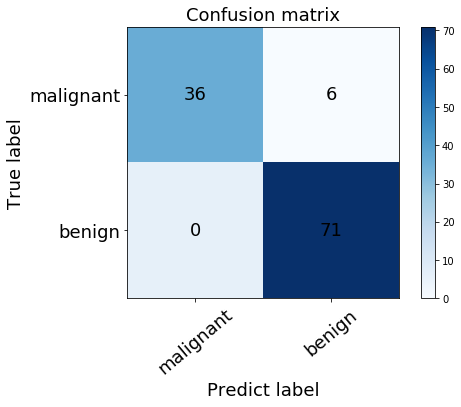

分类正确个数: 107 总样本个数: 113 正确率: 0.9469026548672567

-------------------------------------------------------


------------------第 4 轮
模型训练完毕！参数为:
 {'u0': array([[-0.57308746, -0.37966952, -0.58200076, -0.55375159, -0.21906525,
        -0.4437258 , -0.52952797, -0.59012372, -0.24514844,  0.05867373,
        -0.43975079, -0.01765293, -0.43675848, -0.42622232,  0.0842552 ,
        -0.22152869, -0.18395033, -0.28964249,  0.05951963, -0.03524113,
        -0.61148306, -0.42516227, -0.61834326, -0.57419745, -0.29175359,
        -0.46735656, -0.52118013, -0.61629008, -0.31295646, -0.24084833]]), 'u1': array([[ 0.89556426,  0.53641601,  0.91522791,  0.86352731,  0.48686045,
         0.79488889,  0.90721899,  0.98459199,  0.45919919,  0.03259349,
         0.70567169, -0.02422984,  0.69989446,  0.68412071, -0.06043464,
         0.42729473,  0.35341061,  0.54156053,  0.00463746,  0.14384085,
         0.9566698 ,  0.57658394,  0.96797735,  0.89120764,  0.5623704 ,
         0.8173502 ,  0.89041015,  1.0

confusion [[38  0]
 [ 4 71]]
len(confusion) 2


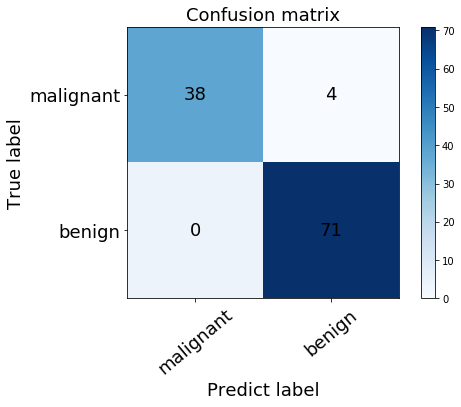

分类正确个数: 109 总样本个数: 113 正确率: 0.9646017699115044

-------------------------------------------------------


------------------第 5 轮
模型训练完毕！参数为:
 {'u0': array([[-0.56833866, -0.38865233, -0.57936084, -0.55181442, -0.33420397,
        -0.5043268 , -0.54129654, -0.61472793, -0.23732317, -0.04115335,
        -0.42992769, -0.00805721, -0.42431261, -0.41999676,  0.02378189,
        -0.22314733, -0.18364797, -0.32019576,  0.04192938, -0.05821924,
        -0.60459286, -0.40841669, -0.60992616, -0.57088937, -0.38933596,
        -0.48122552, -0.51668119, -0.63390768, -0.3073621 , -0.28691515]]), 'u1': array([[ 0.88569059,  0.48012837,  0.90053755,  0.8522998 ,  0.46795556,
         0.75526023,  0.84190212,  0.9622453 ,  0.45812538, -0.00668248,
         0.6993768 , -0.03479253,  0.6841059 ,  0.65541366, -0.09051233,
         0.37092684,  0.29109881,  0.4789476 ,  0.04951983,  0.08980208,
         0.96918002,  0.56481129,  0.97143951,  0.9091549 ,  0.58093619,
         0.77333981,  0.81160941,  1.0

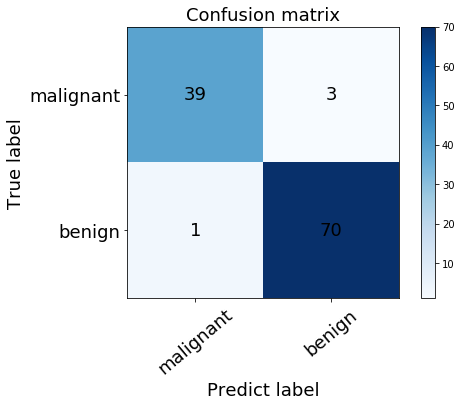

分类正确个数: 109 总样本个数: 113 正确率: 0.9646017699115044

-------------------------------------------------------



In [202]:
from sklearn.model_selection import StratifiedKFold #分层交叉验证
kfold = StratifiedKFold(n_splits=5)#实例化

count = 1 #共5折，表示当前为第几折

#接收每折分类准确率的列表
accuracy = []

#接收每轮预测值的列表，绘制roc曲线
fpr_list = []
tpr_list = []
#计算auc
auc_list = []

#统计TP,FP,TN,FN的列表
statistic_list = []

for train_index,test_index in kfold.split(data,label):
    #print("Train Index:",train_index,",Test Index:",test_index)
    print("\n------------------第",count,"轮")
    
    #划分训练集测试集
    X_train,X_test=data[train_index],data[test_index]#划分X空间
    y_train,y_test=label[train_index],label[test_index]
    
    #进行模型训练 Training
    model = GaussianDiscriminantAnalysis(X_train,y_train,X_test,y_test)
    model.compute_GDA_parameters()
    print("模型训练完毕！参数为:\n",model.parameters)
    
    #验证集
    hypothesis_vector = model.predict()#预测
    
    #对结果进行评价
    correct = 0 #用correct统计被分类正确样本的个数
    
    #接收分类器对测试集样本判断为正例的概率，用于绘制ROC曲线
    _predict_list = model.hypothesis()[1]
    
    #统计用于绘制混淆矩阵的信息
    malignat_malignat = 0 #本来是恶性分类为恶性的样本个数  TP
    malignat_benign = 0#本来是恶性分类为良性的样本个数 FN
    benign_malignat = 0#本来是良性分类为恶性的样本个数 FP
    benign_benign = 0#本来是良性分类为良性的样本个数 TN
    
    for i in range(y_test.shape[0]):
        #检查真值
        #判断混淆矩阵中的计数器谁该增加
        if y_test[i] == 1 and hypothesis_vector[i] == 1:
            malignat_malignat += 1
        if y_test[i] == 1 and hypothesis_vector[i] == 0:
            malignat_benign += 1
        if y_test[i] == 0 and hypothesis_vector[i] == 1:
            benign_malignat += 1
        if y_test[i] == 0 and hypothesis_vector[i] == 0:
            benign_benign += 1
    #绘制混淆矩阵
    conf_matrix = np.array([[malignat_malignat,benign_malignat],[malignat_benign,benign_benign]])
    confusion_matrix(conf_matrix)  
    #精度
    correct = malignat_malignat+benign_benign
    acc = (malignat_malignat+benign_benign)/y_test.shape[0]
    accuracy.append(acc)
    
    #输出TP,FP,TN,FN
    foo = np.array([malignat_malignat,benign_malignat,benign_benign,malignat_benign])
    statistic_list.append(foo)
    
     #为ROC绘制做准备
    _predict_list = np.array(_predict_list)#转为ndarray
    if count != 1:
        #注意：这里由于第1折中的测试集中预测为正例的概率出现了nan导致无法进行roc，auc评估
        #故跳过第1折
        fpr,tpr,thresholds = metrics.roc_curve(y_test,_predict_list)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        #计算auc
        auc = metrics.auc(fpr,tpr)
        auc_list.append(auc)
    
    print("分类正确个数:",correct,"总样本个数:",X_test.shape[0],"正确率:",acc)
    
    print("\n-------------------------------------------------------\n")
    count = count + 1

## 查看模型分类的准确率

In [203]:
print("模型准确率向量",accuracy)
overall = np.mean(accuracy)
print("整体准确率",overall)

模型准确率向量 [0.9565217391304348, 0.9739130434782609, 0.9469026548672567, 0.9646017699115044, 0.9646017699115044]
整体准确率 0.9613081954597922


## 计算模型的召回率(灵敏度)、特效性

In [204]:
#根据statistic_list中的数据计算
for item in statistic_list:
    #item的顺序: TP,FP,TN,FN
    recall = item[0]/(item[0]+item[-1]) #TP/(TP+FN)
    specificity = item[2]/(item[1]+item[2])
    print("recall:",recall," specificity:",specificity)

recall: 0.9069767441860465  specificity: 0.9861111111111112
recall: 0.9302325581395349  specificity: 1.0
recall: 0.8571428571428571  specificity: 1.0
recall: 0.9047619047619048  specificity: 1.0
recall: 0.9285714285714286  specificity: 0.9859154929577465


# 绘制ROC曲线

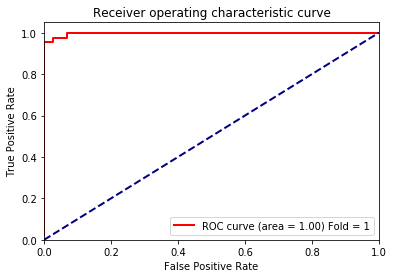

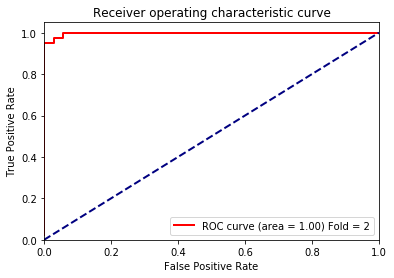

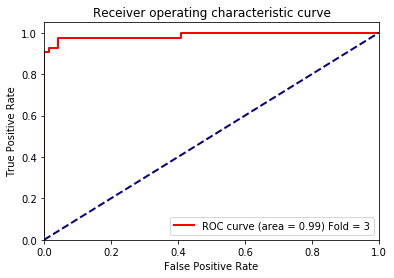

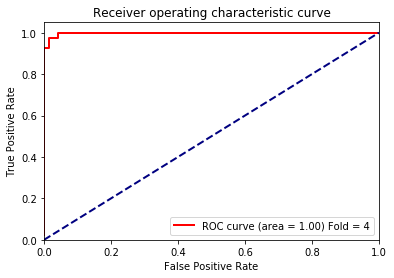

In [206]:
#绘图 
###注意忽略了第0折，因为第0折含有nan，无法计算
plt.figure()
lw = 2
for i in range(4):
    plt.plot(fpr_list[i], tpr_list[i], color='red',
             lw=lw, label='ROC curve (area = %0.2f) Fold = %d' % (auc_list[i],i+1))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [207]:
print("各轮训练出的模型的AUC(跳过第0折)")
print(auc_list)

各轮训练出的模型的AUC(跳过第0折)
[0.9977390180878554, 0.9979879275653923, 0.987927565392354, 0.9983232729711603]


## 叠加在一起的ROC曲线

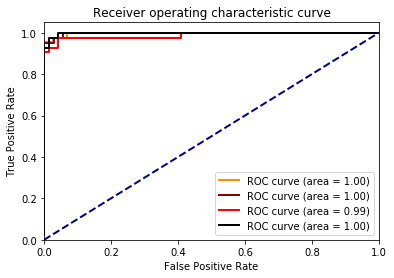

In [212]:
#绘图
plt.figure()
lw = 2
plt.plot(fpr_list[0], tpr_list[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_list[0])
plt.plot(fpr_list[1], tpr_list[1], color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_list[1])
plt.plot(fpr_list[2], tpr_list[2], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_list[2])
plt.plot(fpr_list[3], tpr_list[3], color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_list[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()